In [1]:
%matplotlib inline
from svmutil import *
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
shuffled_file = open('spambase.data.shuffled', 'r')

X_ORIGINAL = []
Y_ORIGINAL = []
with open("spambase.data.shuffled", "r") as shuffled_file:
    for line in shuffled_file:
        values = line.split(',')
        Y_ORIGINAL.append(int(values[-1]))
        x_temp = []
        for i in range(0, values.__len__() - 1):
            x_temp.append(float(values[i]))
        X_ORIGINAL.append(x_temp)
            
x_train = X_ORIGINAL[: 3450]
y_train = Y_ORIGINAL[: 3450]
x_test = X_ORIGINAL[3450:]
y_test = Y_ORIGINAL[3450:]

In [3]:
# convert to libsvm format

shuffled_file_libsvm_format_train = open('data.libsvmformat.train', 'w')
for idx, x in enumerate(x_train):
    libsvm_row = "%d" % (y_train[idx])
    for i, elem in enumerate(x):
        libsvm_row += " %d:%f" % (i + 1, elem)
    shuffled_file_libsvm_format_train.write(libsvm_row)
    shuffled_file_libsvm_format_train.write('\n')
shuffled_file_libsvm_format_train.close()


shuffled_file_libsvm_format_test = open('data.libsvmformat.test', 'w')
for idx, x in enumerate(x_test):
    libsvm_row = "%d" % (y_test[idx])
    for i, elem in enumerate(x):
        libsvm_row += " %d:%f" % (i + 1, elem)
    shuffled_file_libsvm_format_test.write(libsvm_row)
    shuffled_file_libsvm_format_test.write('\n')
shuffled_file_libsvm_format_test.close()

In [4]:
# scale with using of libsvm
subprocess.call("../svm-scale -s %s %s > %s" % \
                ('data.scale', 'data.libsvmformat.train', 'data.libsvmformat.train.scaled'), shell=True)

subprocess.call("../svm-scale -r %s %s > %s" % \
                ('data.scale', 'data.libsvmformat.test', 'data.libsvmformat.test.scaled'), shell=True)


0

In [3]:
def cross_validation_split(x, y, n_folds):
    """ Split data set for n folds. Need for k-fold validation"""
    dataset_split = []
    fold_size = x.__len__() / n_folds
    for i in range(n_folds):
        x_test = x[i * fold_size:(i + 1) * fold_size]
        y_test = y[i * fold_size:(i + 1) * fold_size]
        x_train = x[0: max(i, 0) * fold_size]
        x_train.extend(x[min(i + 1, 10) * fold_size: 10 * fold_size])
        y_train = y[0: max(i, 0) * fold_size]
        y_train.extend(y[min(i + 1, 10) * fold_size: 10 * fold_size])

        dataset_split.append(((x_train, y_train), (x_test, y_test)))
    return dataset_split


def k_fold(x_train, y_train, k_range=range(-10, 15, 1)):
    dataset_split = cross_validation_split(x_train, y_train, 10)

    best_score = 0
    best_c = 0
    best_d = 0
    for_graphic = {}

    for d in [1, 2, 3, 4]:
        for_graphic[d] = []
        for k in k_range:
            c = 2 ** k
            scores = []
            for dataset in dataset_split:
                print "-s 0 -t 1 -d %d -c %f" % (d, c)
                model = svm_train(dataset[0][1], dataset[0][0], "-t 1 -d %d -c %f" % (d, c))
                p_label, p_acc, p_val = svm_predict(dataset[1][1], dataset[1][0], model)
                scores.append(p_acc[0])
            score = sum(scores) / scores.__len__()
            standard_deviation = 0
            for elem in scores:
                standard_deviation += (elem - score) ** 2
            standard_deviation = math.sqrt(standard_deviation / scores.__len__())
            if score > best_score:
                best_score = score
                best_c = c
                best_d = d
            for_graphic[d].append((c, score, standard_deviation))
            print "d: %d, c: %f, score: %f, standard deviation: %f" % (d, c, score, standard_deviation)
    return best_score, best_c, best_d, for_graphic

In [9]:
# training with k-fold
y_train_scaled, x_train_scaled = svm_read_problem('data.libsvmformat.train.scaled')
train_result = k_fold(x_train_scaled, y_train_scaled)

-s 0 -t 1 -d 1 -c 0.000977


Accuracy = 61.4493% (212/345) (classification)
-s 0 -t 1 -d 1 -c 0.000977


Accuracy = 60.8696% (210/345) (classification)
-s 0 -t 1 -d 1 -c 0.000977


Accuracy = 60.5797% (209/345) (classification)
-s 0 -t 1 -d 1 -c 0.000977


Accuracy = 64.6377% (223/345) (classification)
-s 0 -t 1 -d 1 -c 0.000977


Accuracy = 62.3188% (215/345) (classification)
-s 0 -t 1 -d 1 -c 0.000977


Accuracy = 63.4783% (219/345) (classification)
-s 0 -t 1 -d 1 -c 0.000977


Accuracy = 60.5797% (209/345) (classification)
-s 0 -t 1 -d 1 -c 0.000977


KeyboardInterrupt: 

In [7]:
print train_result

(94.1159420289855, 512, 4, {1: [(0.0009765625, 60.72463768115942, 2.612718315553617), (0.001953125, 60.72463768115942, 2.612718315553617), (0.00390625, 60.72463768115942, 2.612718315553617), (0.0078125, 60.72463768115942, 2.612718315553617), (0.015625, 60.72463768115942, 2.612718315553617), (0.03125, 60.72463768115942, 2.612718315553617), (0.0625, 60.72463768115942, 2.612718315553617), (0.125, 60.78260869565217, 2.6152895729755445), (0.25, 64.86956521739131, 2.318115828768951), (0.5, 79.85507246376812, 1.730655679829355), (1, 83.33333333333333, 1.9797334859744), (2, 85.59420289855072, 1.8876220469756437), (4, 87.47826086956522, 1.6128032166079476), (8, 88.98550724637681, 1.6033990360509376), (16, 90.28985507246378, 1.485065328399941), (32, 91.62318840579712, 1.368472073520333), (64, 91.94202898550724, 1.333333333333336), (128, 92.20289855072465, 1.279637104617049), (256, 92.55072463768116, 1.2024619427647272), (512, 92.86956521739131, 1.316848312069628), (1024, 93.13043478260869, 1.216

Лучший результат кросс валидации получил при d=4 и c=512
Точность при таких параметрах: 94.1159420289855

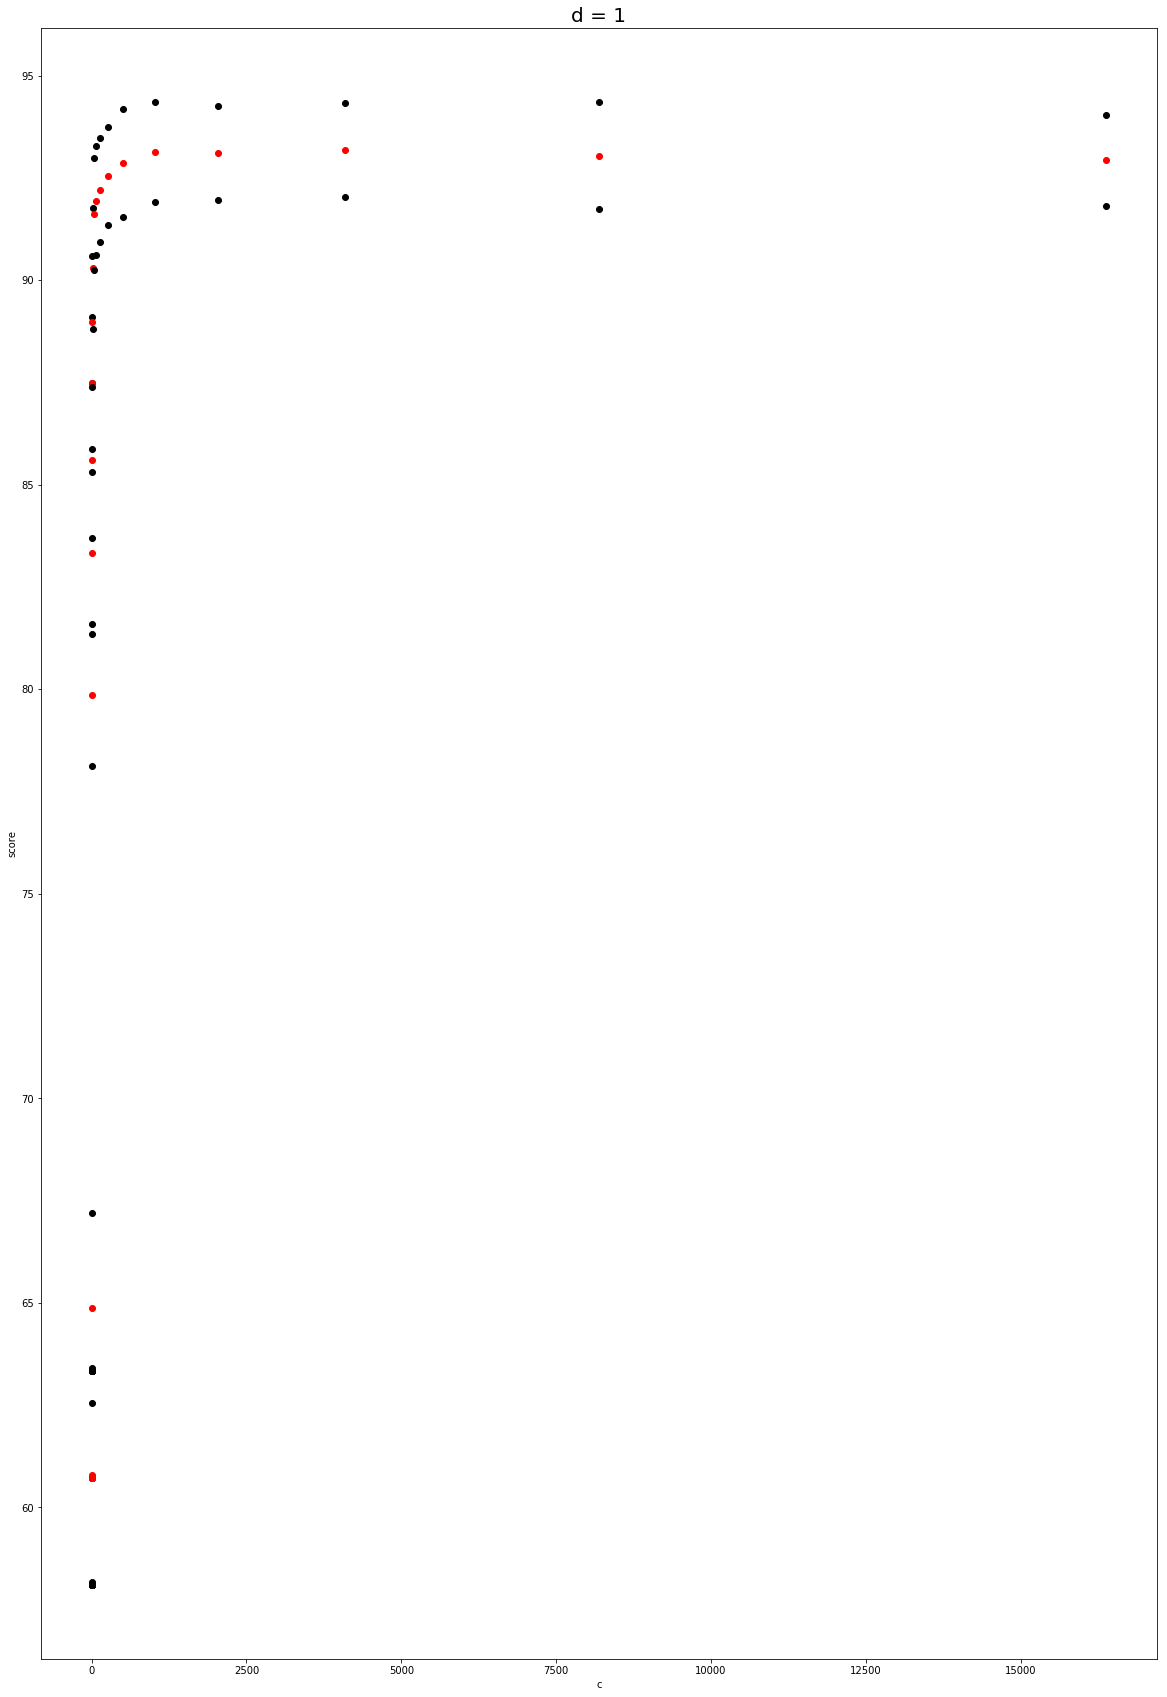

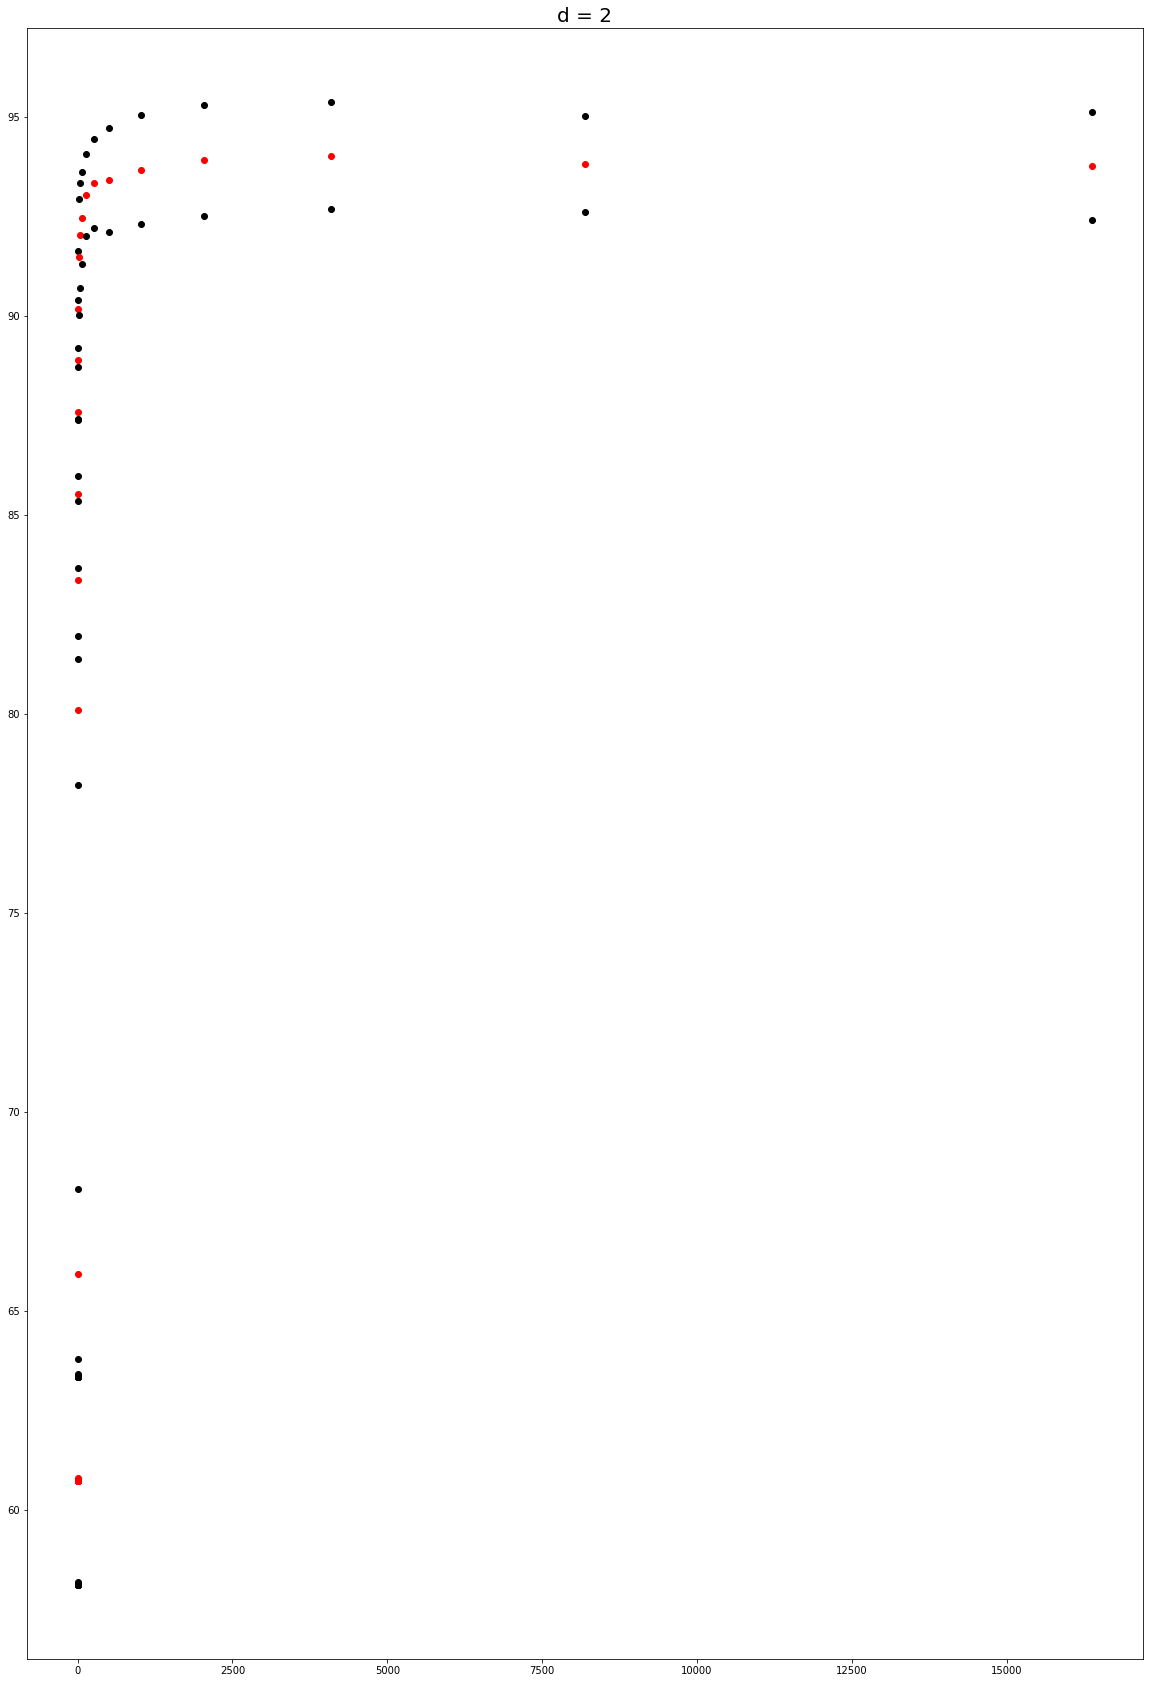

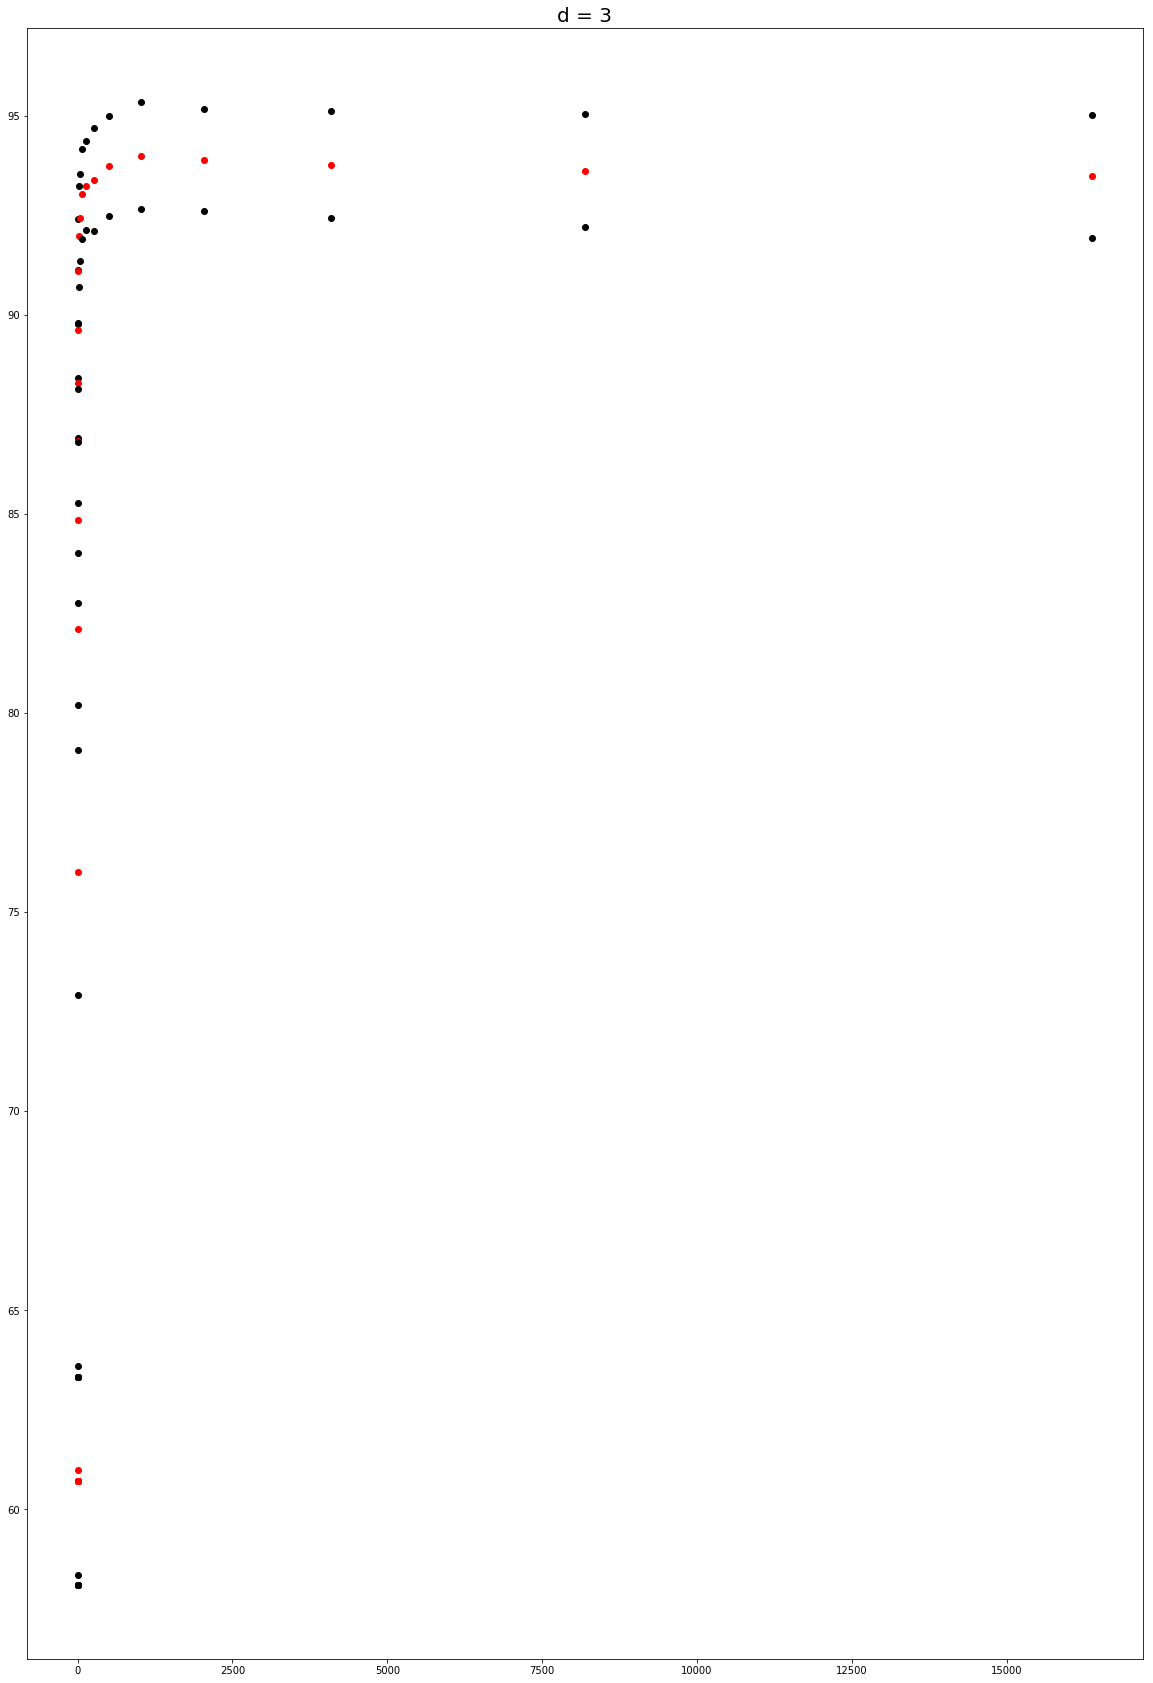

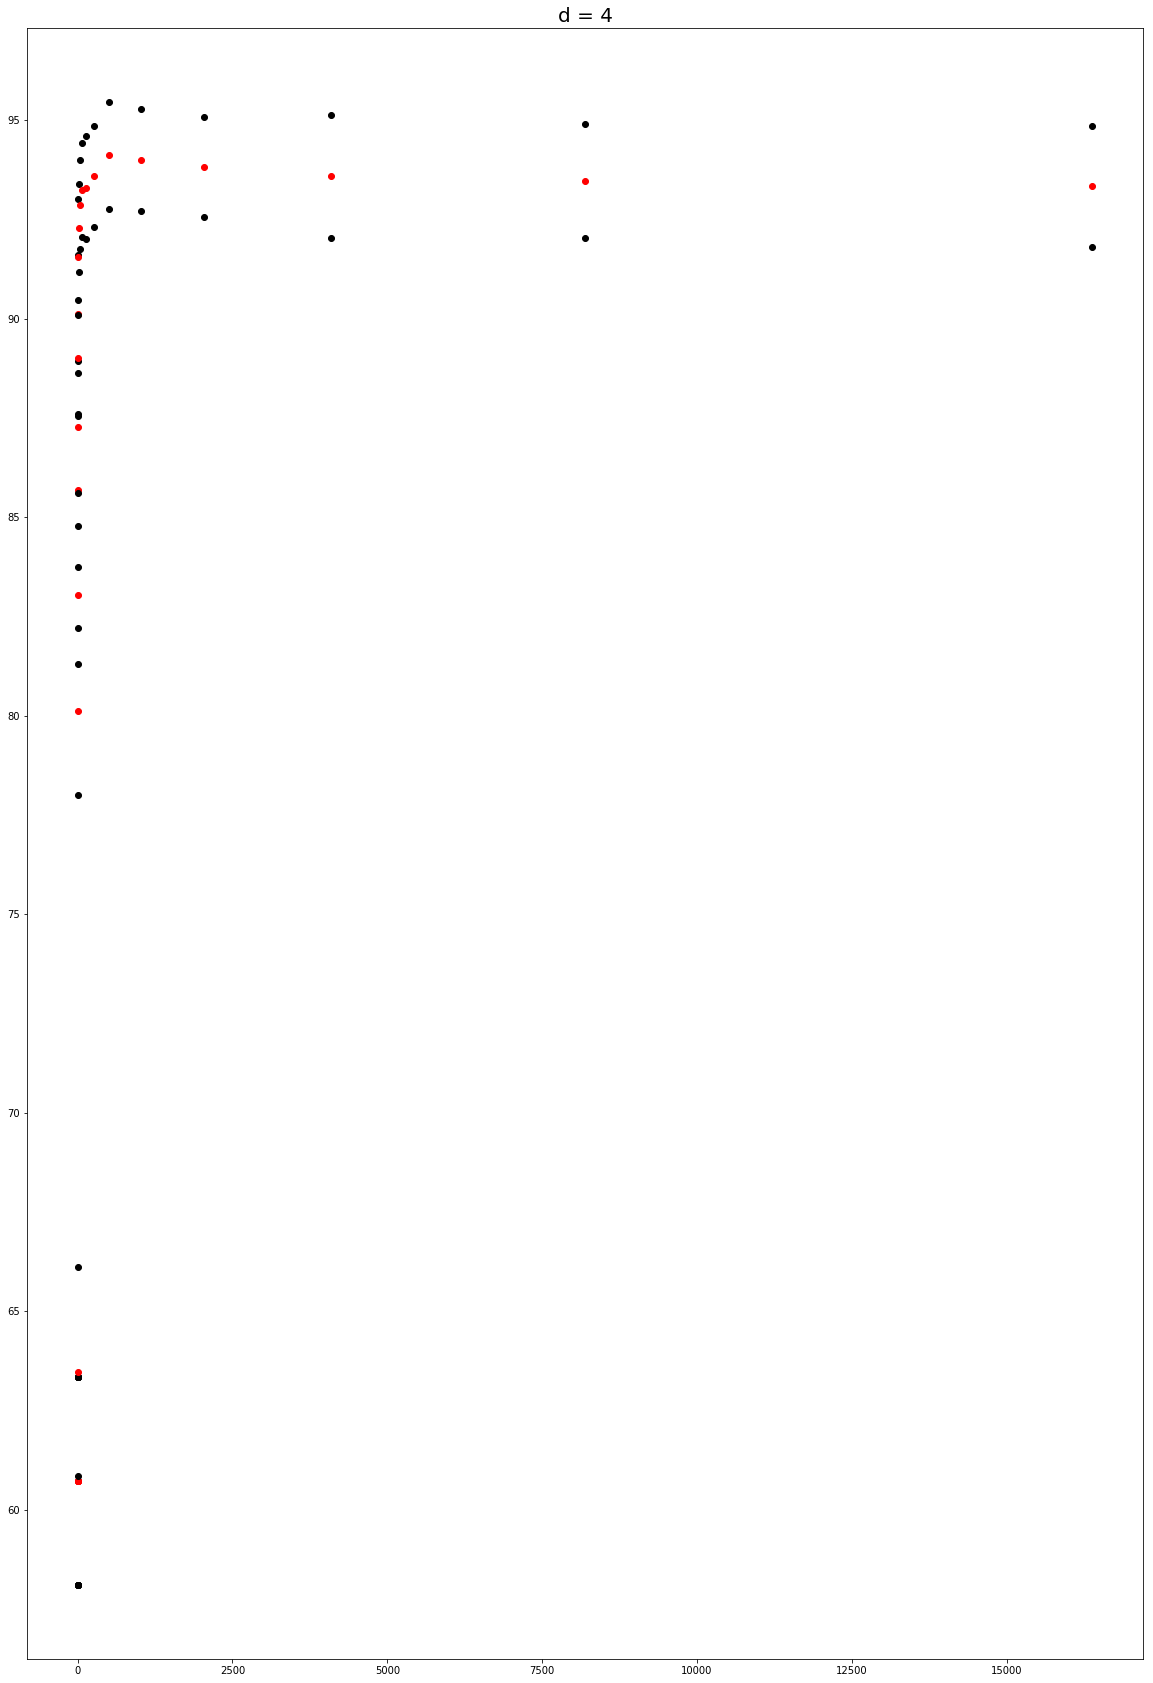

In [9]:
plt.xlabel('c')
plt.ylabel('score')
plt.rcParams["figure.figsize"] = (20, 30)

for key in train_result[3]:
    for elem in train_result[3][key]:
        plt.plot(elem[0], elem[1], 'ro', label='score')
        plt.plot(elem[0], elem[1] + elem[2], 'ko', label='score +- standard_deviation')
        plt.plot(elem[0], elem[1] - elem[2], 'ko')
    plt.title('d = %d' % key, fontsize=20)
    plt.show()

На предыдущих графиках красные точки это точность при некотором с, полученная на кроссвалидации.
Каждые две чёрные точки точки соответстуют одной красной и показывают стандартное отклонение точности на кроссвалидации.

In [10]:
train_result_with_best_c = k_fold(x_train_scaled, y_train_scaled, range(9, 10, 1))

-s 0 -t 1 -d 1 -c 512.000000
Accuracy = 90.4348% (312/345) (classification)
-s 0 -t 1 -d 1 -c 512.000000
Accuracy = 93.0435% (321/345) (classification)
-s 0 -t 1 -d 1 -c 512.000000
Accuracy = 94.2029% (325/345) (classification)
-s 0 -t 1 -d 1 -c 512.000000
Accuracy = 94.7826% (327/345) (classification)
-s 0 -t 1 -d 1 -c 512.000000
Accuracy = 94.2029% (325/345) (classification)
-s 0 -t 1 -d 1 -c 512.000000
Accuracy = 92.7536% (320/345) (classification)
-s 0 -t 1 -d 1 -c 512.000000
Accuracy = 92.7536% (320/345) (classification)
-s 0 -t 1 -d 1 -c 512.000000
Accuracy = 92.1739% (318/345) (classification)
-s 0 -t 1 -d 1 -c 512.000000
Accuracy = 91.0145% (314/345) (classification)
-s 0 -t 1 -d 1 -c 512.000000
Accuracy = 93.3333% (322/345) (classification)
d: 1, c: 512.000000, score: 92.869565, standard deviation: 1.316848
-s 0 -t 1 -d 2 -c 512.000000
Accuracy = 92.7536% (320/345) (classification)
-s 0 -t 1 -d 2 -c 512.000000
Accuracy = 93.3333% (322/345) (classification)
-s 0 -t 1 -d 2 -c 51

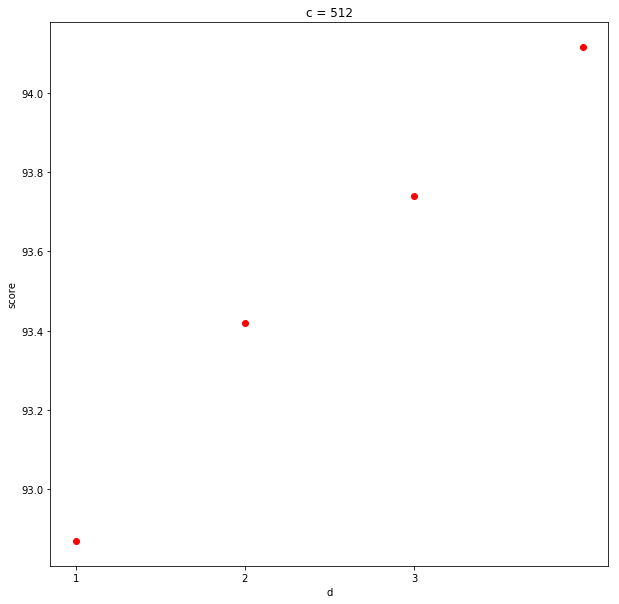

In [12]:
plt.xlabel('d')
plt.ylabel('score')
plt.rcParams["figure.figsize"] = (10, 10)
plt.xticks(np.arange(1, 4, 1))

for key in train_result_with_best_c[3]:
    for elem in train_result_with_best_c[3][key]:
        plt.plot(key, elem[1], 'ro', label='score')
    plt.title('c = 512')
plt.show()

Эта график зависимости точности от d при С* на тренировочной выборке

Accuracy = 92.007% (1059/1151) (classification)
Accuracy = 92.5282% (1065/1151) (classification)
Accuracy = 92.5282% (1065/1151) (classification)
Accuracy = 93.0495% (1071/1151) (classification)


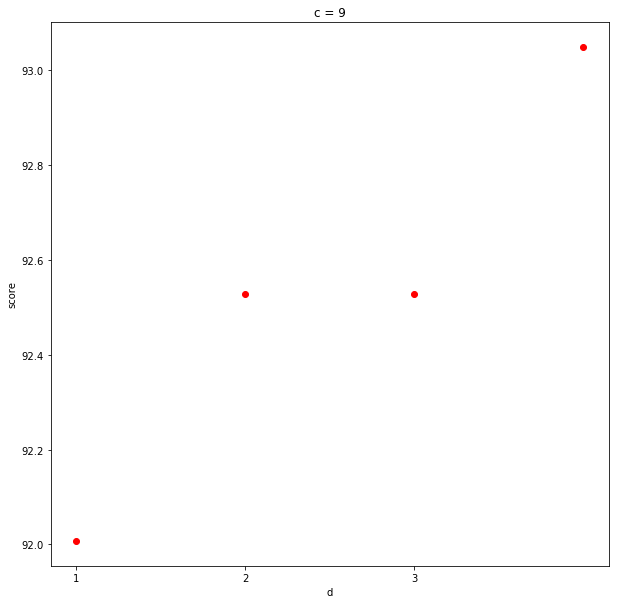

In [13]:
y_test_scaled, x_test_scaled = svm_read_problem('data.libsvmformat.test.scaled')

plt.xlabel('d')
plt.ylabel('score')
plt.rcParams["figure.figsize"] = (10, 10)
plt.xticks(np.arange(1, 4, 1))

for d in [1, 2, 3, 4]:
    model = svm_train(y_train_scaled, x_train_scaled, "-t 1 -d %d -c 512" % d)
    p_label, p_acc, p_val = svm_predict(y_test_scaled, x_test_scaled, model)
    plt.plot(d, p_acc[0], 'ro', label='score')
    
plt.title('c = 9')
plt.show()

Эта график зависимости точности от d при С* на тестовой выборке

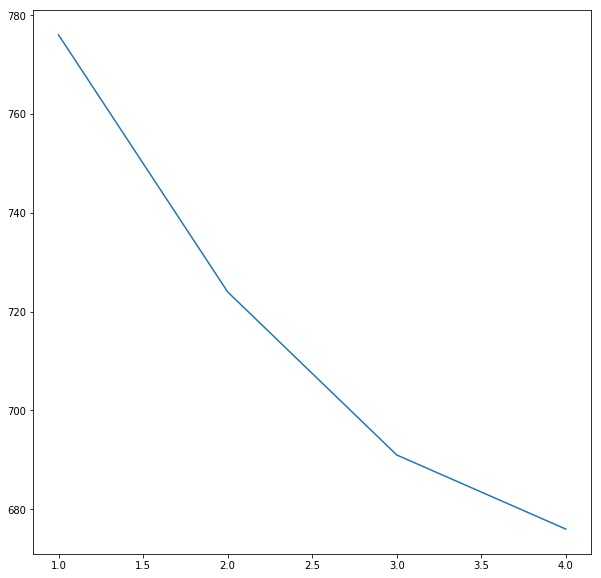

In [14]:
plt.plot([1, 2, 3, 4], [776, 724, 691, 676])

График зависимости кол-ва опорных веторов от d при С* (кол-во опорных векторов выводилось на консоль где был запущен ipython notebook, взял их отдула и не писал скрипт, который получал бы их как-то по-другому)

Для лучших параметров полученных при обучении иодели (d=4, c=512) кол-во опорных векторов получилось 676.
Точность на тестовой выборке 93.0495%

Точность получается лучше при больших степенях полинома.
При малых значениях параметра C, метод опорных векторов не работал. При увеличении этого параметра он начинал работать лучше, однако начиная с некоторого момента результат становился хуже.
При увеличении степени полинома кол-ва опорных векторов уменьшалось.
Метод опорных векторов не переобучился на тренировочной выборке и показал хороший результат на тестовой.

In [33]:
def k_fold_linear_kernel_type(x_train, y_train, k_range=range(13, 14, 1)):
    dataset_split = cross_validation_split(x_train, y_train, 10)

    best_score = 0
    best_c = 0
    best_d = 0
    for_graphic = {}

    for d in [1]:
        for_graphic[d] = []
        for k in k_range:
            c = 2 ** k
            scores = []
            for dataset in dataset_split:
                model = svm_train(dataset[0][1], dataset[0][0], "-t 0 -d %d -c %f" % (d, c))
                p_label, p_acc, p_val = svm_predict(dataset[1][1], dataset[1][0], model)
                scores.append(p_acc[0])
            score = sum(scores) / scores.__len__()
            standard_deviation = 0
            for elem in scores:
                standard_deviation += (elem - score) ** 2
            standard_deviation = math.sqrt(standard_deviation / scores.__len__())
            if score > best_score:
                best_score = score
                best_c = c
                best_d = d
            for_graphic[d].append((c, score, standard_deviation))
            print "d: %d, c: %f, score: %f, standard deviation: %f" % (d, c, score, standard_deviation)
    return best_score, best_c, best_d, for_graphic


In [34]:
# training with k-fold
y_train_scaled, x_train_scaled = svm_read_problem('data.libsvmformat.train.scaled')
train_result = k_fold_linear_kernel_type(x_train_scaled, y_train_scaled)

-s 0 -t 1 -d 1 -c 8192.000000


Accuracy = 91.3043% (315/345) (classification)
-s 0 -t 1 -d 1 -c 8192.000000


Accuracy = 70.1449% (242/345) (classification)
-s 0 -t 1 -d 1 -c 8192.000000


Accuracy = 94.7826% (327/345) (classification)
-s 0 -t 1 -d 1 -c 8192.000000


Accuracy = 94.4928% (326/345) (classification)
-s 0 -t 1 -d 1 -c 8192.000000


Accuracy = 57.6812% (199/345) (classification)
-s 0 -t 1 -d 1 -c 8192.000000


Accuracy = 92.7536% (320/345) (classification)
-s 0 -t 1 -d 1 -c 8192.000000


Accuracy = 51.5942% (178/345) (classification)
-s 0 -t 1 -d 1 -c 8192.000000


Accuracy = 75.3623% (259/345) (classification)
-s 0 -t 1 -d 1 -c 8192.000000


Accuracy = 90.4348% (312/345) (classification)
-s 0 -t 1 -d 1 -c 8192.000000


Accuracy = 92.4638% (319/345) (classification)
d: 1, c: 8192.000000, score: 81.101449, standard deviation: 15.475004


In [6]:
print train_result

(93.21739130434783, 64, 1, {1: [(0.5, 91.39130434782608, 1.2504147600071303), (1, 91.9710144927536, 1.5064100243694252), (2, 92.1449275362319, 1.279637104617049), (4, 92.66666666666666, 1.0693256084461862), (8, 92.8695652173913, 1.2779946484086142), (16, 93.07246376811594, 1.374597762478767), (32, 93.10144927536233, 1.113586823901366), (64, 93.21739130434783, 1.1823813364852815), (128, 93.07246376811595, 1.3056354353107478), (256, 92.9855072463768, 1.1579701075616327), (512, 92.92753623188405, 1.0705034963837328)], 2: [(0.5, 91.39130434782608, 1.2504147600071303), (1, 91.9710144927536, 1.5064100243694252), (2, 92.1449275362319, 1.279637104617049), (4, 92.66666666666666, 1.0693256084461862), (8, 92.8695652173913, 1.2779946484086142), (16, 93.07246376811594, 1.374597762478767), (32, 93.10144927536233, 1.113586823901366), (64, 93.21739130434783, 1.1823813364852815), (128, 93.07246376811595, 1.3056354353107478), (256, 92.9855072463768, 1.1579701075616327), (512, 92.92753623188405, 1.070503

In [16]:
y_test_scaled, x_test_scaled = svm_read_problem('data.libsvmformat.test.scaled')
model = svm_train(y_train_scaled, x_train_scaled, "-t 0 -d 1 -c 64")
p_label, p_acc, p_val = svm_predict(y_test_scaled, x_test_scaled, model)

Accuracy = 91.8332% (1057/1151) (classification)


In [21]:
def k_fold_gamma_type(x_train, y_train, k_range=range(-1, 10, 1)):
    dataset_split = cross_validation_split(x_train, y_train, 10)

    best_score = 0
    best_c = 0
    best_d = 0
    for_graphic = {}

    for d in [1, 2, 3, 4]:
        for_graphic[d] = []
        for k in k_range:
            c = 2 ** k
            scores = []
            for dataset in dataset_split:
                model = svm_train(dataset[0][1], dataset[0][0], "-t 2 -d %d -c %f" % (d, c))
                p_label, p_acc, p_val = svm_predict(dataset[1][1], dataset[1][0], model)
                scores.append(p_acc[0])
            score = sum(scores) / scores.__len__()
            standard_deviation = 0
            for elem in scores:
                standard_deviation += (elem - score) ** 2
            standard_deviation = math.sqrt(standard_deviation / scores.__len__())
            if score > best_score:
                best_score = score
                best_c = c
                best_d = d
            for_graphic[d].append((c, score, standard_deviation))
            print "d: %d, c: %f, score: %f, standard deviation: %f" % (d, c, score, standard_deviation)
    return best_score, best_c, best_d, for_graphic

In [22]:
# training with k-fold
y_train_scaled, x_train_scaled = svm_read_problem('data.libsvmformat.train.scaled')
train_result = k_fold_gamma_type(x_train_scaled, y_train_scaled)

Accuracy = 82.3188% (284/345) (classification)


Accuracy = 81.1594% (280/345) (classification)


Accuracy = 84.9275% (293/345) (classification)


Accuracy = 83.4783% (288/345) (classification)


Accuracy = 83.4783% (288/345) (classification)


Accuracy = 83.4783% (288/345) (classification)


Accuracy = 86.9565% (300/345) (classification)


Accuracy = 82.6087% (284/345) (classification)


Accuracy = 80.2899% (277/345) (classification)


Accuracy = 85.7971% (296/345) (classification)
d: 1, c: 0.500000, score: 83.449275, standard deviation: 1.929007


Accuracy = 84.3478% (290/345) (classification)


Accuracy = 85.2174% (294/345) (classification)


Accuracy = 87.8261% (303/345) (classification)


Accuracy = 84.3478% (290/345) (classification)


Accuracy = 85.7971% (296/345) (classification)


Accuracy = 85.7971% (296/345) (classification)


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 83.4783% (288/345) (classification)


Accuracy = 83.4783% (288/345) (classification)


Accuracy = 88.6957% (306/345) (classification)
d: 1, c: 1.000000, score: 85.739130, standard deviation: 1.859596


Accuracy = 86.3768% (298/345) (classification)


Accuracy = 86.6667% (299/345) (classification)


Accuracy = 90.1449% (311/345) (classification)


Accuracy = 86.6667% (299/345) (classification)


Accuracy = 87.2464% (301/345) (classification)


Accuracy = 87.2464% (301/345) (classification)


Accuracy = 89.8551% (309/345) (classification)


Accuracy = 85.2174% (294/345) (classification)


Accuracy = 86.3768% (298/345) (classification)


Accuracy = 90.4348% (312/345) (classification)
d: 1, c: 2.000000, score: 87.623188, standard deviation: 1.739372


Accuracy = 87.8261% (303/345) (classification)


Accuracy = 90.1449% (311/345) (classification)


Accuracy = 90.7246% (313/345) (classification)


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 88.9855% (307/345) (classification)


Accuracy = 89.2754% (308/345) (classification)


Accuracy = 90.4348% (312/345) (classification)


Accuracy = 87.2464% (301/345) (classification)


Accuracy = 87.2464% (301/345) (classification)


Accuracy = 91.8841% (317/345) (classification)
d: 1, c: 4.000000, score: 89.217391, standard deviation: 1.488174


Accuracy = 89.5652% (309/345) (classification)


Accuracy = 92.1739% (318/345) (classification)


Accuracy = 93.6232% (322/345) (classification)


Accuracy = 90.7246% (313/345) (classification)


Accuracy = 90.4348% (312/345) (classification)


Accuracy = 90.1449% (311/345) (classification)


Accuracy = 90.4348% (312/345) (classification)


Accuracy = 90.7246% (313/345) (classification)


Accuracy = 88.9855% (307/345) (classification)


Accuracy = 93.6232% (322/345) (classification)
d: 1, c: 8.000000, score: 91.043478, standard deviation: 1.508639


Accuracy = 90.7246% (313/345) (classification)


Accuracy = 93.0435% (321/345) (classification)


Accuracy = 94.7826% (327/345) (classification)


Accuracy = 92.4638% (319/345) (classification)


Accuracy = 92.1739% (318/345) (classification)


Accuracy = 91.8841% (317/345) (classification)


Accuracy = 90.7246% (313/345) (classification)


Accuracy = 92.1739% (318/345) (classification)


Accuracy = 89.2754% (308/345) (classification)


Accuracy = 92.4638% (319/345) (classification)
d: 1, c: 16.000000, score: 91.971014, standard deviation: 1.414362


Accuracy = 91.8841% (317/345) (classification)


Accuracy = 93.0435% (321/345) (classification)


Accuracy = 94.4928% (326/345) (classification)


Accuracy = 93.3333% (322/345) (classification)


Accuracy = 93.0435% (321/345) (classification)


Accuracy = 92.7536% (320/345) (classification)


Accuracy = 91.5942% (315/345) (classification)


Accuracy = 92.4638% (319/345) (classification)


Accuracy = 90.1449% (311/345) (classification)


Accuracy = 93.0435% (321/345) (classification)
d: 1, c: 32.000000, score: 92.579710, standard deviation: 1.109051


Accuracy = 93.0435% (321/345) (classification)


Accuracy = 92.7536% (320/345) (classification)


Accuracy = 94.7826% (327/345) (classification)


Accuracy = 94.2029% (325/345) (classification)


Accuracy = 93.3333% (322/345) (classification)


Accuracy = 93.0435% (321/345) (classification)


Accuracy = 91.3043% (315/345) (classification)


Accuracy = 93.6232% (322/345) (classification)


Accuracy = 91.0145% (314/345) (classification)


Accuracy = 93.3333% (322/345) (classification)
d: 1, c: 64.000000, score: 93.043478, standard deviation: 1.099923


Accuracy = 93.0435% (321/345) (classification)


Accuracy = 93.6232% (322/345) (classification)


Accuracy = 95.3623% (329/345) (classification)


Accuracy = 94.2029% (325/345) (classification)


Accuracy = 93.913% (324/345) (classification)


Accuracy = 93.3333% (322/345) (classification)


Accuracy = 91.8841% (317/345) (classification)


Accuracy = 93.913% (324/345) (classification)


Accuracy = 91.5942% (315/345) (classification)


Accuracy = 94.2029% (325/345) (classification)
d: 1, c: 128.000000, score: 93.507246, standard deviation: 1.062626


Accuracy = 93.3333% (322/345) (classification)


Accuracy = 93.913% (324/345) (classification)


Accuracy = 95.3623% (329/345) (classification)


Accuracy = 94.4928% (326/345) (classification)


Accuracy = 94.2029% (325/345) (classification)


Accuracy = 93.6232% (322/345) (classification)


Accuracy = 92.4638% (319/345) (classification)


Accuracy = 93.6232% (322/345) (classification)


Accuracy = 91.0145% (314/345) (classification)


Accuracy = 93.6232% (322/345) (classification)
d: 1, c: 256.000000, score: 93.565217, standard deviation: 1.113587


Accuracy = 93.0435% (321/345) (classification)


Accuracy = 94.2029% (325/345) (classification)


Accuracy = 95.3623% (329/345) (classification)


Accuracy = 94.2029% (325/345) (classification)


Accuracy = 94.7826% (327/345) (classification)


Accuracy = 93.3333% (322/345) (classification)


Accuracy = 92.4638% (319/345) (classification)


Accuracy = 93.6232% (322/345) (classification)


Accuracy = 91.3043% (315/345) (classification)


Accuracy = 93.3333% (322/345) (classification)
d: 1, c: 512.000000, score: 93.565217, standard deviation: 1.106016


Accuracy = 82.3188% (284/345) (classification)


Accuracy = 81.1594% (280/345) (classification)


Accuracy = 84.9275% (293/345) (classification)


Accuracy = 83.4783% (288/345) (classification)


Accuracy = 83.4783% (288/345) (classification)


Accuracy = 83.4783% (288/345) (classification)


Accuracy = 86.9565% (300/345) (classification)


Accuracy = 82.6087% (284/345) (classification)


Accuracy = 80.2899% (277/345) (classification)


Accuracy = 85.7971% (296/345) (classification)
d: 2, c: 0.500000, score: 83.449275, standard deviation: 1.929007


Accuracy = 84.3478% (290/345) (classification)


Accuracy = 85.2174% (294/345) (classification)


Accuracy = 87.8261% (303/345) (classification)


Accuracy = 84.3478% (290/345) (classification)


Accuracy = 85.7971% (296/345) (classification)


Accuracy = 85.7971% (296/345) (classification)


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 83.4783% (288/345) (classification)


Accuracy = 83.4783% (288/345) (classification)


Accuracy = 88.6957% (306/345) (classification)
d: 2, c: 1.000000, score: 85.739130, standard deviation: 1.859596


Accuracy = 86.3768% (298/345) (classification)


Accuracy = 86.6667% (299/345) (classification)


Accuracy = 90.1449% (311/345) (classification)


Accuracy = 86.6667% (299/345) (classification)


Accuracy = 87.2464% (301/345) (classification)


Accuracy = 87.2464% (301/345) (classification)


Accuracy = 89.8551% (309/345) (classification)


Accuracy = 85.2174% (294/345) (classification)


Accuracy = 86.3768% (298/345) (classification)


Accuracy = 90.4348% (312/345) (classification)
d: 2, c: 2.000000, score: 87.623188, standard deviation: 1.739372


Accuracy = 87.8261% (303/345) (classification)


Accuracy = 90.1449% (311/345) (classification)


Accuracy = 90.7246% (313/345) (classification)


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 88.9855% (307/345) (classification)


Accuracy = 89.2754% (308/345) (classification)


Accuracy = 90.4348% (312/345) (classification)


Accuracy = 87.2464% (301/345) (classification)


Accuracy = 87.2464% (301/345) (classification)


Accuracy = 91.8841% (317/345) (classification)
d: 2, c: 4.000000, score: 89.217391, standard deviation: 1.488174


Accuracy = 89.5652% (309/345) (classification)


Accuracy = 92.1739% (318/345) (classification)


Accuracy = 93.6232% (322/345) (classification)


Accuracy = 90.7246% (313/345) (classification)


Accuracy = 90.4348% (312/345) (classification)


Accuracy = 90.1449% (311/345) (classification)


Accuracy = 90.4348% (312/345) (classification)


Accuracy = 90.7246% (313/345) (classification)


Accuracy = 88.9855% (307/345) (classification)


Accuracy = 93.6232% (322/345) (classification)
d: 2, c: 8.000000, score: 91.043478, standard deviation: 1.508639


Accuracy = 90.7246% (313/345) (classification)


Accuracy = 93.0435% (321/345) (classification)


Accuracy = 94.7826% (327/345) (classification)


Accuracy = 92.4638% (319/345) (classification)


Accuracy = 92.1739% (318/345) (classification)


Accuracy = 91.8841% (317/345) (classification)


Accuracy = 90.7246% (313/345) (classification)


Accuracy = 92.1739% (318/345) (classification)


Accuracy = 89.2754% (308/345) (classification)


Accuracy = 92.4638% (319/345) (classification)
d: 2, c: 16.000000, score: 91.971014, standard deviation: 1.414362


Accuracy = 91.8841% (317/345) (classification)


Accuracy = 93.0435% (321/345) (classification)


Accuracy = 94.4928% (326/345) (classification)


Accuracy = 93.3333% (322/345) (classification)


Accuracy = 93.0435% (321/345) (classification)


Accuracy = 92.7536% (320/345) (classification)


Accuracy = 91.5942% (315/345) (classification)


Accuracy = 92.4638% (319/345) (classification)


Accuracy = 90.1449% (311/345) (classification)


Accuracy = 93.0435% (321/345) (classification)
d: 2, c: 32.000000, score: 92.579710, standard deviation: 1.109051


Accuracy = 93.0435% (321/345) (classification)


Accuracy = 92.7536% (320/345) (classification)


Accuracy = 94.7826% (327/345) (classification)


Accuracy = 94.2029% (325/345) (classification)


Accuracy = 93.3333% (322/345) (classification)


Accuracy = 93.0435% (321/345) (classification)


Accuracy = 91.3043% (315/345) (classification)


Accuracy = 93.6232% (322/345) (classification)


Accuracy = 91.0145% (314/345) (classification)


Accuracy = 93.3333% (322/345) (classification)
d: 2, c: 64.000000, score: 93.043478, standard deviation: 1.099923


Accuracy = 93.0435% (321/345) (classification)


Accuracy = 93.6232% (322/345) (classification)


Accuracy = 95.3623% (329/345) (classification)


Accuracy = 94.2029% (325/345) (classification)


Accuracy = 93.913% (324/345) (classification)


Accuracy = 93.3333% (322/345) (classification)


Accuracy = 91.8841% (317/345) (classification)


Accuracy = 93.913% (324/345) (classification)


Accuracy = 91.5942% (315/345) (classification)


Accuracy = 94.2029% (325/345) (classification)
d: 2, c: 128.000000, score: 93.507246, standard deviation: 1.062626


Accuracy = 93.3333% (322/345) (classification)


Accuracy = 93.913% (324/345) (classification)


Accuracy = 95.3623% (329/345) (classification)


Accuracy = 94.4928% (326/345) (classification)


Accuracy = 94.2029% (325/345) (classification)


Accuracy = 93.6232% (322/345) (classification)


Accuracy = 92.4638% (319/345) (classification)


Accuracy = 93.6232% (322/345) (classification)


Accuracy = 91.0145% (314/345) (classification)


Accuracy = 93.6232% (322/345) (classification)
d: 2, c: 256.000000, score: 93.565217, standard deviation: 1.113587


Accuracy = 93.0435% (321/345) (classification)


Accuracy = 94.2029% (325/345) (classification)


Accuracy = 95.3623% (329/345) (classification)


Accuracy = 94.2029% (325/345) (classification)


Accuracy = 94.7826% (327/345) (classification)


Accuracy = 93.3333% (322/345) (classification)


Accuracy = 92.4638% (319/345) (classification)


Accuracy = 93.6232% (322/345) (classification)


Accuracy = 91.3043% (315/345) (classification)


Accuracy = 93.3333% (322/345) (classification)
d: 2, c: 512.000000, score: 93.565217, standard deviation: 1.106016


Accuracy = 82.3188% (284/345) (classification)


Accuracy = 81.1594% (280/345) (classification)


Accuracy = 84.9275% (293/345) (classification)


Accuracy = 83.4783% (288/345) (classification)


Accuracy = 83.4783% (288/345) (classification)


Accuracy = 83.4783% (288/345) (classification)


Accuracy = 86.9565% (300/345) (classification)


Accuracy = 82.6087% (284/345) (classification)


Accuracy = 80.2899% (277/345) (classification)


Accuracy = 85.7971% (296/345) (classification)
d: 3, c: 0.500000, score: 83.449275, standard deviation: 1.929007


Accuracy = 84.3478% (290/345) (classification)


Accuracy = 85.2174% (294/345) (classification)


Accuracy = 87.8261% (303/345) (classification)


Accuracy = 84.3478% (290/345) (classification)


Accuracy = 85.7971% (296/345) (classification)


Accuracy = 85.7971% (296/345) (classification)


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 83.4783% (288/345) (classification)


Accuracy = 83.4783% (288/345) (classification)


Accuracy = 88.6957% (306/345) (classification)
d: 3, c: 1.000000, score: 85.739130, standard deviation: 1.859596


Accuracy = 86.3768% (298/345) (classification)


Accuracy = 86.6667% (299/345) (classification)


Accuracy = 90.1449% (311/345) (classification)


Accuracy = 86.6667% (299/345) (classification)


Accuracy = 87.2464% (301/345) (classification)


Accuracy = 87.2464% (301/345) (classification)


Accuracy = 89.8551% (309/345) (classification)


Accuracy = 85.2174% (294/345) (classification)


Accuracy = 86.3768% (298/345) (classification)


Accuracy = 90.4348% (312/345) (classification)
d: 3, c: 2.000000, score: 87.623188, standard deviation: 1.739372


Accuracy = 87.8261% (303/345) (classification)


Accuracy = 90.1449% (311/345) (classification)


Accuracy = 90.7246% (313/345) (classification)


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 88.9855% (307/345) (classification)


Accuracy = 89.2754% (308/345) (classification)


Accuracy = 90.4348% (312/345) (classification)


Accuracy = 87.2464% (301/345) (classification)


Accuracy = 87.2464% (301/345) (classification)


Accuracy = 91.8841% (317/345) (classification)
d: 3, c: 4.000000, score: 89.217391, standard deviation: 1.488174


Accuracy = 89.5652% (309/345) (classification)


Accuracy = 92.1739% (318/345) (classification)


Accuracy = 93.6232% (322/345) (classification)


Accuracy = 90.7246% (313/345) (classification)


Accuracy = 90.4348% (312/345) (classification)


Accuracy = 90.1449% (311/345) (classification)


Accuracy = 90.4348% (312/345) (classification)


Accuracy = 90.7246% (313/345) (classification)


Accuracy = 88.9855% (307/345) (classification)


Accuracy = 93.6232% (322/345) (classification)
d: 3, c: 8.000000, score: 91.043478, standard deviation: 1.508639


Accuracy = 90.7246% (313/345) (classification)


Accuracy = 93.0435% (321/345) (classification)


Accuracy = 94.7826% (327/345) (classification)


Accuracy = 92.4638% (319/345) (classification)


Accuracy = 92.1739% (318/345) (classification)


Accuracy = 91.8841% (317/345) (classification)


Accuracy = 90.7246% (313/345) (classification)


Accuracy = 92.1739% (318/345) (classification)


Accuracy = 89.2754% (308/345) (classification)


Accuracy = 92.4638% (319/345) (classification)
d: 3, c: 16.000000, score: 91.971014, standard deviation: 1.414362


Accuracy = 91.8841% (317/345) (classification)


Accuracy = 93.0435% (321/345) (classification)


Accuracy = 94.4928% (326/345) (classification)


Accuracy = 93.3333% (322/345) (classification)


Accuracy = 93.0435% (321/345) (classification)


Accuracy = 92.7536% (320/345) (classification)


Accuracy = 91.5942% (315/345) (classification)


Accuracy = 92.4638% (319/345) (classification)


Accuracy = 90.1449% (311/345) (classification)


Accuracy = 93.0435% (321/345) (classification)
d: 3, c: 32.000000, score: 92.579710, standard deviation: 1.109051


Accuracy = 93.0435% (321/345) (classification)


Accuracy = 92.7536% (320/345) (classification)


Accuracy = 94.7826% (327/345) (classification)


Accuracy = 94.2029% (325/345) (classification)


Accuracy = 93.3333% (322/345) (classification)


Accuracy = 93.0435% (321/345) (classification)


Accuracy = 91.3043% (315/345) (classification)


Accuracy = 93.6232% (322/345) (classification)


Accuracy = 91.0145% (314/345) (classification)


Accuracy = 93.3333% (322/345) (classification)
d: 3, c: 64.000000, score: 93.043478, standard deviation: 1.099923


Accuracy = 93.0435% (321/345) (classification)


Accuracy = 93.6232% (322/345) (classification)


Accuracy = 95.3623% (329/345) (classification)


Accuracy = 94.2029% (325/345) (classification)


Accuracy = 93.913% (324/345) (classification)


Accuracy = 93.3333% (322/345) (classification)


Accuracy = 91.8841% (317/345) (classification)


Accuracy = 93.913% (324/345) (classification)


Accuracy = 91.5942% (315/345) (classification)


Accuracy = 94.2029% (325/345) (classification)
d: 3, c: 128.000000, score: 93.507246, standard deviation: 1.062626


Accuracy = 93.3333% (322/345) (classification)


Accuracy = 93.913% (324/345) (classification)


Accuracy = 95.3623% (329/345) (classification)


Accuracy = 94.4928% (326/345) (classification)


Accuracy = 94.2029% (325/345) (classification)


Accuracy = 93.6232% (322/345) (classification)


Accuracy = 92.4638% (319/345) (classification)


Accuracy = 93.6232% (322/345) (classification)


Accuracy = 91.0145% (314/345) (classification)


Accuracy = 93.6232% (322/345) (classification)
d: 3, c: 256.000000, score: 93.565217, standard deviation: 1.113587


Accuracy = 93.0435% (321/345) (classification)


Accuracy = 94.2029% (325/345) (classification)


Accuracy = 95.3623% (329/345) (classification)


Accuracy = 94.2029% (325/345) (classification)


Accuracy = 94.7826% (327/345) (classification)


Accuracy = 93.3333% (322/345) (classification)


Accuracy = 92.4638% (319/345) (classification)


Accuracy = 93.6232% (322/345) (classification)


Accuracy = 91.3043% (315/345) (classification)


Accuracy = 93.3333% (322/345) (classification)
d: 3, c: 512.000000, score: 93.565217, standard deviation: 1.106016


Accuracy = 82.3188% (284/345) (classification)


Accuracy = 81.1594% (280/345) (classification)


Accuracy = 84.9275% (293/345) (classification)


Accuracy = 83.4783% (288/345) (classification)


Accuracy = 83.4783% (288/345) (classification)


Accuracy = 83.4783% (288/345) (classification)


Accuracy = 86.9565% (300/345) (classification)


Accuracy = 82.6087% (284/345) (classification)


Accuracy = 80.2899% (277/345) (classification)


Accuracy = 85.7971% (296/345) (classification)
d: 4, c: 0.500000, score: 83.449275, standard deviation: 1.929007


Accuracy = 84.3478% (290/345) (classification)


Accuracy = 85.2174% (294/345) (classification)


Accuracy = 87.8261% (303/345) (classification)


Accuracy = 84.3478% (290/345) (classification)


Accuracy = 85.7971% (296/345) (classification)


Accuracy = 85.7971% (296/345) (classification)


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 83.4783% (288/345) (classification)


Accuracy = 83.4783% (288/345) (classification)


Accuracy = 88.6957% (306/345) (classification)
d: 4, c: 1.000000, score: 85.739130, standard deviation: 1.859596


Accuracy = 86.3768% (298/345) (classification)


Accuracy = 86.6667% (299/345) (classification)


Accuracy = 90.1449% (311/345) (classification)


Accuracy = 86.6667% (299/345) (classification)


Accuracy = 87.2464% (301/345) (classification)


Accuracy = 87.2464% (301/345) (classification)


Accuracy = 89.8551% (309/345) (classification)


Accuracy = 85.2174% (294/345) (classification)


Accuracy = 86.3768% (298/345) (classification)


Accuracy = 90.4348% (312/345) (classification)
d: 4, c: 2.000000, score: 87.623188, standard deviation: 1.739372


Accuracy = 87.8261% (303/345) (classification)


Accuracy = 90.1449% (311/345) (classification)


Accuracy = 90.7246% (313/345) (classification)


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 88.9855% (307/345) (classification)


Accuracy = 89.2754% (308/345) (classification)


Accuracy = 90.4348% (312/345) (classification)


Accuracy = 87.2464% (301/345) (classification)


Accuracy = 87.2464% (301/345) (classification)


Accuracy = 91.8841% (317/345) (classification)
d: 4, c: 4.000000, score: 89.217391, standard deviation: 1.488174


Accuracy = 89.5652% (309/345) (classification)


Accuracy = 92.1739% (318/345) (classification)


Accuracy = 93.6232% (322/345) (classification)


Accuracy = 90.7246% (313/345) (classification)


Accuracy = 90.4348% (312/345) (classification)


Accuracy = 90.1449% (311/345) (classification)


Accuracy = 90.4348% (312/345) (classification)


Accuracy = 90.7246% (313/345) (classification)


Accuracy = 88.9855% (307/345) (classification)


Accuracy = 93.6232% (322/345) (classification)
d: 4, c: 8.000000, score: 91.043478, standard deviation: 1.508639


Accuracy = 90.7246% (313/345) (classification)


Accuracy = 93.0435% (321/345) (classification)


Accuracy = 94.7826% (327/345) (classification)


Accuracy = 92.4638% (319/345) (classification)


Accuracy = 92.1739% (318/345) (classification)


Accuracy = 91.8841% (317/345) (classification)


Accuracy = 90.7246% (313/345) (classification)


Accuracy = 92.1739% (318/345) (classification)


Accuracy = 89.2754% (308/345) (classification)


Accuracy = 92.4638% (319/345) (classification)
d: 4, c: 16.000000, score: 91.971014, standard deviation: 1.414362


Accuracy = 91.8841% (317/345) (classification)


Accuracy = 93.0435% (321/345) (classification)


Accuracy = 94.4928% (326/345) (classification)


Accuracy = 93.3333% (322/345) (classification)


Accuracy = 93.0435% (321/345) (classification)


Accuracy = 92.7536% (320/345) (classification)


Accuracy = 91.5942% (315/345) (classification)


Accuracy = 92.4638% (319/345) (classification)


Accuracy = 90.1449% (311/345) (classification)


Accuracy = 93.0435% (321/345) (classification)
d: 4, c: 32.000000, score: 92.579710, standard deviation: 1.109051


Accuracy = 93.0435% (321/345) (classification)


Accuracy = 92.7536% (320/345) (classification)


Accuracy = 94.7826% (327/345) (classification)


Accuracy = 94.2029% (325/345) (classification)


Accuracy = 93.3333% (322/345) (classification)


Accuracy = 93.0435% (321/345) (classification)


Accuracy = 91.3043% (315/345) (classification)


Accuracy = 93.6232% (322/345) (classification)


Accuracy = 91.0145% (314/345) (classification)


Accuracy = 93.3333% (322/345) (classification)
d: 4, c: 64.000000, score: 93.043478, standard deviation: 1.099923


Accuracy = 93.0435% (321/345) (classification)


Accuracy = 93.6232% (322/345) (classification)


Accuracy = 95.3623% (329/345) (classification)


Accuracy = 94.2029% (325/345) (classification)


Accuracy = 93.913% (324/345) (classification)


Accuracy = 93.3333% (322/345) (classification)


Accuracy = 91.8841% (317/345) (classification)


Accuracy = 93.913% (324/345) (classification)


Accuracy = 91.5942% (315/345) (classification)


Accuracy = 94.2029% (325/345) (classification)
d: 4, c: 128.000000, score: 93.507246, standard deviation: 1.062626


Accuracy = 93.3333% (322/345) (classification)


Accuracy = 93.913% (324/345) (classification)


Accuracy = 95.3623% (329/345) (classification)


Accuracy = 94.4928% (326/345) (classification)


Accuracy = 94.2029% (325/345) (classification)


Accuracy = 93.6232% (322/345) (classification)


Accuracy = 92.4638% (319/345) (classification)


Accuracy = 93.6232% (322/345) (classification)


Accuracy = 91.0145% (314/345) (classification)


Accuracy = 93.6232% (322/345) (classification)
d: 4, c: 256.000000, score: 93.565217, standard deviation: 1.113587


Accuracy = 93.0435% (321/345) (classification)


Accuracy = 94.2029% (325/345) (classification)


Accuracy = 95.3623% (329/345) (classification)


Accuracy = 94.2029% (325/345) (classification)


Accuracy = 94.7826% (327/345) (classification)


Accuracy = 93.3333% (322/345) (classification)


Accuracy = 92.4638% (319/345) (classification)


Accuracy = 93.6232% (322/345) (classification)


Accuracy = 91.3043% (315/345) (classification)


Accuracy = 93.3333% (322/345) (classification)
d: 4, c: 512.000000, score: 93.565217, standard deviation: 1.106016


In [23]:
print train_result

(93.56521739130434, 256, 1, {1: [(0.5, 83.44927536231884, 1.9290067399391122), (1, 85.7391304347826, 1.85959593418498), (2, 87.6231884057971, 1.7393719639046363), (4, 89.21739130434784, 1.4881736409267772), (8, 91.04347826086956, 1.5086392672084732), (16, 91.97101449275362, 1.4143620752180697), (32, 92.57971014492753, 1.1090508098382006), (64, 93.04347826086956, 1.0999226644063929), (128, 93.5072463768116, 1.0626262481057018), (256, 93.56521739130434, 1.1135868239013642), (512, 93.56521739130434, 1.1060164654109512)], 2: [(0.5, 83.44927536231884, 1.9290067399391122), (1, 85.7391304347826, 1.85959593418498), (2, 87.6231884057971, 1.7393719639046363), (4, 89.21739130434784, 1.4881736409267772), (8, 91.04347826086956, 1.5086392672084732), (16, 91.97101449275362, 1.4143620752180697), (32, 92.57971014492753, 1.1090508098382006), (64, 93.04347826086956, 1.0999226644063929), (128, 93.5072463768116, 1.0626262481057018), (256, 93.56521739130434, 1.1135868239013642), (512, 93.56521739130434, 1.1

In [24]:
y_test_scaled, x_test_scaled = svm_read_problem('data.libsvmformat.test.scaled')
model = svm_train(y_train_scaled, x_train_scaled, "-t 2 -d 1 -c 256")
p_label, p_acc, p_val = svm_predict(y_test_scaled, x_test_scaled, model)

Accuracy = 92.2676% (1062/1151) (classification)


In [25]:
def k_fold_sigmoid_type(x_train, y_train, k_range=range(-1, 10, 1)):
    dataset_split = cross_validation_split(x_train, y_train, 10)

    best_score = 0
    best_c = 0
    best_d = 0
    for_graphic = {}

    for d in [1, 2, 3, 4]:
        for_graphic[d] = []
        for k in k_range:
            c = 2 ** k
            scores = []
            for dataset in dataset_split:
                model = svm_train(dataset[0][1], dataset[0][0], "-t 3 -d %d -c %f" % (d, c))
                p_label, p_acc, p_val = svm_predict(dataset[1][1], dataset[1][0], model)
                scores.append(p_acc[0])
            score = sum(scores) / scores.__len__()
            standard_deviation = 0
            for elem in scores:
                standard_deviation += (elem - score) ** 2
            standard_deviation = math.sqrt(standard_deviation / scores.__len__())
            if score > best_score:
                best_score = score
                best_c = c
                best_d = d
            for_graphic[d].append((c, score, standard_deviation))
            print "d: %d, c: %f, score: %f, standard deviation: %f" % (d, c, score, standard_deviation)
    return best_score, best_c, best_d, for_graphic

In [26]:
# training with k-fold
y_train_scaled, x_train_scaled = svm_read_problem('data.libsvmformat.train.scaled')
train_result = k_fold_sigmoid_type(x_train_scaled, y_train_scaled)

Accuracy = 60.8696% (210/345) (classification)


Accuracy = 61.7391% (213/345) (classification)


Accuracy = 61.1594% (211/345) (classification)


Accuracy = 64.3478% (221/345) (classification)


Accuracy = 62.029% (214/345) (classification)


Accuracy = 64.058% (221/345) (classification)


Accuracy = 62.3188% (215/345) (classification)


Accuracy = 60.5797% (209/345) (classification)


Accuracy = 54.2029% (187/345) (classification)


Accuracy = 59.4203% (205/345) (classification)
d: 1, c: 0.500000, score: 61.072464, standard deviation: 2.697522


Accuracy = 75.942% (262/345) (classification)


Accuracy = 76.5217% (264/345) (classification)


Accuracy = 76.8116% (265/345) (classification)


Accuracy = 76.8116% (265/345) (classification)


Accuracy = 75.6522% (261/345) (classification)


Accuracy = 79.7101% (275/345) (classification)


Accuracy = 80.5797% (278/345) (classification)


Accuracy = 73.6232% (253/345) (classification)


Accuracy = 70.1449% (242/345) (classification)


Accuracy = 75.0725% (259/345) (classification)
d: 1, c: 1.000000, score: 76.086957, standard deviation: 2.777925


Accuracy = 81.4493% (281/345) (classification)


Accuracy = 82.3188% (284/345) (classification)


Accuracy = 84.3478% (290/345) (classification)


Accuracy = 83.1884% (287/345) (classification)


Accuracy = 80.8696% (278/345) (classification)


Accuracy = 81.7391% (282/345) (classification)


Accuracy = 84.6377% (292/345) (classification)


Accuracy = 82.029% (283/345) (classification)


Accuracy = 79.7101% (275/345) (classification)


Accuracy = 84.058% (290/345) (classification)
d: 1, c: 2.000000, score: 82.434783, standard deviation: 1.523877


Accuracy = 84.058% (290/345) (classification)


Accuracy = 84.058% (290/345) (classification)


Accuracy = 87.5362% (302/345) (classification)


Accuracy = 84.9275% (293/345) (classification)


Accuracy = 84.6377% (292/345) (classification)


Accuracy = 82.6087% (284/345) (classification)


Accuracy = 86.9565% (300/345) (classification)


Accuracy = 84.3478% (290/345) (classification)


Accuracy = 82.029% (283/345) (classification)


Accuracy = 86.6667% (299/345) (classification)
d: 1, c: 4.000000, score: 84.782609, standard deviation: 1.716030


Accuracy = 86.6667% (299/345) (classification)


Accuracy = 85.5072% (295/345) (classification)


Accuracy = 89.2754% (308/345) (classification)


Accuracy = 85.5072% (295/345) (classification)


Accuracy = 86.087% (297/345) (classification)


Accuracy = 86.087% (297/345) (classification)


Accuracy = 89.2754% (308/345) (classification)


Accuracy = 85.7971% (296/345) (classification)


Accuracy = 84.6377% (292/345) (classification)


Accuracy = 90.4348% (312/345) (classification)
d: 1, c: 8.000000, score: 86.927536, standard deviation: 1.880487


Accuracy = 87.5362% (302/345) (classification)


Accuracy = 88.9855% (307/345) (classification)


Accuracy = 91.5942% (315/345) (classification)


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 86.9565% (300/345) (classification)


Accuracy = 91.0145% (314/345) (classification)


Accuracy = 86.3768% (298/345) (classification)


Accuracy = 86.3768% (298/345) (classification)


Accuracy = 91.0145% (314/345) (classification)
d: 1, c: 16.000000, score: 88.666667, standard deviation: 1.858014


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 91.5942% (315/345) (classification)


Accuracy = 91.5942% (315/345) (classification)


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 89.2754% (308/345) (classification)


Accuracy = 89.2754% (308/345) (classification)


Accuracy = 90.7246% (313/345) (classification)


Accuracy = 89.5652% (309/345) (classification)


Accuracy = 88.1159% (303/345) (classification)


Accuracy = 92.1739% (318/345) (classification)
d: 1, c: 32.000000, score: 89.913043, standard deviation: 1.418810


Accuracy = 89.5652% (309/345) (classification)


Accuracy = 92.7536% (320/345) (classification)


Accuracy = 92.7536% (320/345) (classification)


Accuracy = 90.1449% (311/345) (classification)


Accuracy = 90.7246% (313/345) (classification)


Accuracy = 91.3043% (315/345) (classification)


Accuracy = 91.8841% (317/345) (classification)


Accuracy = 88.9855% (307/345) (classification)


Accuracy = 88.1159% (303/345) (classification)


Accuracy = 93.0435% (321/345) (classification)
d: 1, c: 64.000000, score: 90.927536, standard deviation: 1.624482


Accuracy = 89.8551% (309/345) (classification)


Accuracy = 91.5942% (315/345) (classification)


Accuracy = 93.6232% (322/345) (classification)


Accuracy = 91.0145% (314/345) (classification)


Accuracy = 91.8841% (317/345) (classification)


Accuracy = 91.3043% (315/345) (classification)


Accuracy = 91.8841% (317/345) (classification)


Accuracy = 88.6957% (306/345) (classification)


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 92.7536% (320/345) (classification)
d: 1, c: 128.000000, score: 91.101449, standard deviation: 1.587866


Accuracy = 86.3768% (298/345) (classification)


Accuracy = 90.4348% (312/345) (classification)


Accuracy = 89.5652% (309/345) (classification)


Accuracy = 91.3043% (315/345) (classification)


Accuracy = 90.1449% (311/345) (classification)


Accuracy = 87.8261% (303/345) (classification)


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 89.8551% (309/345) (classification)


Accuracy = 86.6667% (299/345) (classification)


Accuracy = 89.5652% (309/345) (classification)
d: 1, c: 256.000000, score: 89.014493, standard deviation: 1.552552


Accuracy = 85.7971% (296/345) (classification)


Accuracy = 88.9855% (307/345) (classification)


Accuracy = 89.2754% (308/345) (classification)


Accuracy = 90.1449% (311/345) (classification)


Accuracy = 89.5652% (309/345) (classification)


Accuracy = 87.2464% (301/345) (classification)


Accuracy = 87.8261% (303/345) (classification)


Accuracy = 87.2464% (301/345) (classification)


Accuracy = 85.2174% (294/345) (classification)


Accuracy = 87.8261% (303/345) (classification)
d: 1, c: 512.000000, score: 87.913043, standard deviation: 1.528556


Accuracy = 60.8696% (210/345) (classification)


Accuracy = 61.7391% (213/345) (classification)


Accuracy = 61.1594% (211/345) (classification)


Accuracy = 64.3478% (221/345) (classification)


Accuracy = 62.029% (214/345) (classification)


Accuracy = 64.058% (221/345) (classification)


Accuracy = 62.3188% (215/345) (classification)


Accuracy = 60.5797% (209/345) (classification)


Accuracy = 54.2029% (187/345) (classification)


Accuracy = 59.4203% (205/345) (classification)
d: 2, c: 0.500000, score: 61.072464, standard deviation: 2.697522


Accuracy = 75.942% (262/345) (classification)


Accuracy = 76.5217% (264/345) (classification)


Accuracy = 76.8116% (265/345) (classification)


Accuracy = 76.8116% (265/345) (classification)


Accuracy = 75.6522% (261/345) (classification)


Accuracy = 79.7101% (275/345) (classification)


Accuracy = 80.5797% (278/345) (classification)


Accuracy = 73.6232% (253/345) (classification)


Accuracy = 70.1449% (242/345) (classification)


Accuracy = 75.0725% (259/345) (classification)
d: 2, c: 1.000000, score: 76.086957, standard deviation: 2.777925


Accuracy = 81.4493% (281/345) (classification)


Accuracy = 82.3188% (284/345) (classification)


Accuracy = 84.3478% (290/345) (classification)


Accuracy = 83.1884% (287/345) (classification)


Accuracy = 80.8696% (278/345) (classification)


Accuracy = 81.7391% (282/345) (classification)


Accuracy = 84.6377% (292/345) (classification)


Accuracy = 82.029% (283/345) (classification)


Accuracy = 79.7101% (275/345) (classification)


Accuracy = 84.058% (290/345) (classification)
d: 2, c: 2.000000, score: 82.434783, standard deviation: 1.523877


Accuracy = 84.058% (290/345) (classification)


Accuracy = 84.058% (290/345) (classification)


Accuracy = 87.5362% (302/345) (classification)


Accuracy = 84.9275% (293/345) (classification)


Accuracy = 84.6377% (292/345) (classification)


Accuracy = 82.6087% (284/345) (classification)


Accuracy = 86.9565% (300/345) (classification)


Accuracy = 84.3478% (290/345) (classification)


Accuracy = 82.029% (283/345) (classification)


Accuracy = 86.6667% (299/345) (classification)
d: 2, c: 4.000000, score: 84.782609, standard deviation: 1.716030


Accuracy = 86.6667% (299/345) (classification)


Accuracy = 85.5072% (295/345) (classification)


Accuracy = 89.2754% (308/345) (classification)


Accuracy = 85.5072% (295/345) (classification)


Accuracy = 86.087% (297/345) (classification)


Accuracy = 86.087% (297/345) (classification)


Accuracy = 89.2754% (308/345) (classification)


Accuracy = 85.7971% (296/345) (classification)


Accuracy = 84.6377% (292/345) (classification)


Accuracy = 90.4348% (312/345) (classification)
d: 2, c: 8.000000, score: 86.927536, standard deviation: 1.880487


Accuracy = 87.5362% (302/345) (classification)


Accuracy = 88.9855% (307/345) (classification)


Accuracy = 91.5942% (315/345) (classification)


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 86.9565% (300/345) (classification)


Accuracy = 91.0145% (314/345) (classification)


Accuracy = 86.3768% (298/345) (classification)


Accuracy = 86.3768% (298/345) (classification)


Accuracy = 91.0145% (314/345) (classification)
d: 2, c: 16.000000, score: 88.666667, standard deviation: 1.858014


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 91.5942% (315/345) (classification)


Accuracy = 91.5942% (315/345) (classification)


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 89.2754% (308/345) (classification)


Accuracy = 89.2754% (308/345) (classification)


Accuracy = 90.7246% (313/345) (classification)


Accuracy = 89.5652% (309/345) (classification)


Accuracy = 88.1159% (303/345) (classification)


Accuracy = 92.1739% (318/345) (classification)
d: 2, c: 32.000000, score: 89.913043, standard deviation: 1.418810


Accuracy = 89.5652% (309/345) (classification)


Accuracy = 92.7536% (320/345) (classification)


Accuracy = 92.7536% (320/345) (classification)


Accuracy = 90.1449% (311/345) (classification)


Accuracy = 90.7246% (313/345) (classification)


Accuracy = 91.3043% (315/345) (classification)


Accuracy = 91.8841% (317/345) (classification)


Accuracy = 88.9855% (307/345) (classification)


Accuracy = 88.1159% (303/345) (classification)


Accuracy = 93.0435% (321/345) (classification)
d: 2, c: 64.000000, score: 90.927536, standard deviation: 1.624482


Accuracy = 89.8551% (309/345) (classification)


Accuracy = 91.5942% (315/345) (classification)


Accuracy = 93.6232% (322/345) (classification)


Accuracy = 91.0145% (314/345) (classification)


Accuracy = 91.8841% (317/345) (classification)


Accuracy = 91.3043% (315/345) (classification)


Accuracy = 91.8841% (317/345) (classification)


Accuracy = 88.6957% (306/345) (classification)


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 92.7536% (320/345) (classification)
d: 2, c: 128.000000, score: 91.101449, standard deviation: 1.587866


Accuracy = 86.3768% (298/345) (classification)


Accuracy = 90.4348% (312/345) (classification)


Accuracy = 89.5652% (309/345) (classification)


Accuracy = 91.3043% (315/345) (classification)


Accuracy = 90.1449% (311/345) (classification)


Accuracy = 87.8261% (303/345) (classification)


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 89.8551% (309/345) (classification)


Accuracy = 86.6667% (299/345) (classification)


Accuracy = 89.5652% (309/345) (classification)
d: 2, c: 256.000000, score: 89.014493, standard deviation: 1.552552


Accuracy = 85.7971% (296/345) (classification)


Accuracy = 88.9855% (307/345) (classification)


Accuracy = 89.2754% (308/345) (classification)


Accuracy = 90.1449% (311/345) (classification)


Accuracy = 89.5652% (309/345) (classification)


Accuracy = 87.2464% (301/345) (classification)


Accuracy = 87.8261% (303/345) (classification)


Accuracy = 87.2464% (301/345) (classification)


Accuracy = 85.2174% (294/345) (classification)


Accuracy = 87.8261% (303/345) (classification)
d: 2, c: 512.000000, score: 87.913043, standard deviation: 1.528556


Accuracy = 60.8696% (210/345) (classification)


Accuracy = 61.7391% (213/345) (classification)


Accuracy = 61.1594% (211/345) (classification)


Accuracy = 64.3478% (221/345) (classification)


Accuracy = 62.029% (214/345) (classification)


Accuracy = 64.058% (221/345) (classification)


Accuracy = 62.3188% (215/345) (classification)


Accuracy = 60.5797% (209/345) (classification)


Accuracy = 54.2029% (187/345) (classification)


Accuracy = 59.4203% (205/345) (classification)
d: 3, c: 0.500000, score: 61.072464, standard deviation: 2.697522


Accuracy = 75.942% (262/345) (classification)


Accuracy = 76.5217% (264/345) (classification)


Accuracy = 76.8116% (265/345) (classification)


Accuracy = 76.8116% (265/345) (classification)


Accuracy = 75.6522% (261/345) (classification)


Accuracy = 79.7101% (275/345) (classification)


Accuracy = 80.5797% (278/345) (classification)


Accuracy = 73.6232% (253/345) (classification)


Accuracy = 70.1449% (242/345) (classification)


Accuracy = 75.0725% (259/345) (classification)
d: 3, c: 1.000000, score: 76.086957, standard deviation: 2.777925


Accuracy = 81.4493% (281/345) (classification)


Accuracy = 82.3188% (284/345) (classification)


Accuracy = 84.3478% (290/345) (classification)


Accuracy = 83.1884% (287/345) (classification)


Accuracy = 80.8696% (278/345) (classification)


Accuracy = 81.7391% (282/345) (classification)


Accuracy = 84.6377% (292/345) (classification)


Accuracy = 82.029% (283/345) (classification)


Accuracy = 79.7101% (275/345) (classification)


Accuracy = 84.058% (290/345) (classification)
d: 3, c: 2.000000, score: 82.434783, standard deviation: 1.523877


Accuracy = 84.058% (290/345) (classification)


Accuracy = 84.058% (290/345) (classification)


Accuracy = 87.5362% (302/345) (classification)


Accuracy = 84.9275% (293/345) (classification)


Accuracy = 84.6377% (292/345) (classification)


Accuracy = 82.6087% (284/345) (classification)


Accuracy = 86.9565% (300/345) (classification)


Accuracy = 84.3478% (290/345) (classification)


Accuracy = 82.029% (283/345) (classification)


Accuracy = 86.6667% (299/345) (classification)
d: 3, c: 4.000000, score: 84.782609, standard deviation: 1.716030


Accuracy = 86.6667% (299/345) (classification)


Accuracy = 85.5072% (295/345) (classification)


Accuracy = 89.2754% (308/345) (classification)


Accuracy = 85.5072% (295/345) (classification)


Accuracy = 86.087% (297/345) (classification)


Accuracy = 86.087% (297/345) (classification)


Accuracy = 89.2754% (308/345) (classification)


Accuracy = 85.7971% (296/345) (classification)


Accuracy = 84.6377% (292/345) (classification)


Accuracy = 90.4348% (312/345) (classification)
d: 3, c: 8.000000, score: 86.927536, standard deviation: 1.880487


Accuracy = 87.5362% (302/345) (classification)


Accuracy = 88.9855% (307/345) (classification)


Accuracy = 91.5942% (315/345) (classification)


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 86.9565% (300/345) (classification)


Accuracy = 91.0145% (314/345) (classification)


Accuracy = 86.3768% (298/345) (classification)


Accuracy = 86.3768% (298/345) (classification)


Accuracy = 91.0145% (314/345) (classification)
d: 3, c: 16.000000, score: 88.666667, standard deviation: 1.858014


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 91.5942% (315/345) (classification)


Accuracy = 91.5942% (315/345) (classification)


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 89.2754% (308/345) (classification)


Accuracy = 89.2754% (308/345) (classification)


Accuracy = 90.7246% (313/345) (classification)


Accuracy = 89.5652% (309/345) (classification)


Accuracy = 88.1159% (303/345) (classification)


Accuracy = 92.1739% (318/345) (classification)
d: 3, c: 32.000000, score: 89.913043, standard deviation: 1.418810


Accuracy = 89.5652% (309/345) (classification)


Accuracy = 92.7536% (320/345) (classification)


Accuracy = 92.7536% (320/345) (classification)


Accuracy = 90.1449% (311/345) (classification)


Accuracy = 90.7246% (313/345) (classification)


Accuracy = 91.3043% (315/345) (classification)


Accuracy = 91.8841% (317/345) (classification)


Accuracy = 88.9855% (307/345) (classification)


Accuracy = 88.1159% (303/345) (classification)


Accuracy = 93.0435% (321/345) (classification)
d: 3, c: 64.000000, score: 90.927536, standard deviation: 1.624482


Accuracy = 89.8551% (309/345) (classification)


Accuracy = 91.5942% (315/345) (classification)


Accuracy = 93.6232% (322/345) (classification)


Accuracy = 91.0145% (314/345) (classification)


Accuracy = 91.8841% (317/345) (classification)


Accuracy = 91.3043% (315/345) (classification)


Accuracy = 91.8841% (317/345) (classification)


Accuracy = 88.6957% (306/345) (classification)


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 92.7536% (320/345) (classification)
d: 3, c: 128.000000, score: 91.101449, standard deviation: 1.587866


Accuracy = 86.3768% (298/345) (classification)


Accuracy = 90.4348% (312/345) (classification)


Accuracy = 89.5652% (309/345) (classification)


Accuracy = 91.3043% (315/345) (classification)


Accuracy = 90.1449% (311/345) (classification)


Accuracy = 87.8261% (303/345) (classification)


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 89.8551% (309/345) (classification)


Accuracy = 86.6667% (299/345) (classification)


Accuracy = 89.5652% (309/345) (classification)
d: 3, c: 256.000000, score: 89.014493, standard deviation: 1.552552


Accuracy = 85.7971% (296/345) (classification)


Accuracy = 88.9855% (307/345) (classification)


Accuracy = 89.2754% (308/345) (classification)


Accuracy = 90.1449% (311/345) (classification)


Accuracy = 89.5652% (309/345) (classification)


Accuracy = 87.2464% (301/345) (classification)


Accuracy = 87.8261% (303/345) (classification)


Accuracy = 87.2464% (301/345) (classification)


Accuracy = 85.2174% (294/345) (classification)


Accuracy = 87.8261% (303/345) (classification)
d: 3, c: 512.000000, score: 87.913043, standard deviation: 1.528556


Accuracy = 60.8696% (210/345) (classification)


Accuracy = 61.7391% (213/345) (classification)


Accuracy = 61.1594% (211/345) (classification)


Accuracy = 64.3478% (221/345) (classification)


Accuracy = 62.029% (214/345) (classification)


Accuracy = 64.058% (221/345) (classification)


Accuracy = 62.3188% (215/345) (classification)


Accuracy = 60.5797% (209/345) (classification)


Accuracy = 54.2029% (187/345) (classification)


Accuracy = 59.4203% (205/345) (classification)
d: 4, c: 0.500000, score: 61.072464, standard deviation: 2.697522


Accuracy = 75.942% (262/345) (classification)


Accuracy = 76.5217% (264/345) (classification)


Accuracy = 76.8116% (265/345) (classification)


Accuracy = 76.8116% (265/345) (classification)


Accuracy = 75.6522% (261/345) (classification)


Accuracy = 79.7101% (275/345) (classification)


Accuracy = 80.5797% (278/345) (classification)


Accuracy = 73.6232% (253/345) (classification)


Accuracy = 70.1449% (242/345) (classification)


Accuracy = 75.0725% (259/345) (classification)
d: 4, c: 1.000000, score: 76.086957, standard deviation: 2.777925


Accuracy = 81.4493% (281/345) (classification)


Accuracy = 82.3188% (284/345) (classification)


Accuracy = 84.3478% (290/345) (classification)


Accuracy = 83.1884% (287/345) (classification)


Accuracy = 80.8696% (278/345) (classification)


Accuracy = 81.7391% (282/345) (classification)


Accuracy = 84.6377% (292/345) (classification)


Accuracy = 82.029% (283/345) (classification)


Accuracy = 79.7101% (275/345) (classification)


Accuracy = 84.058% (290/345) (classification)
d: 4, c: 2.000000, score: 82.434783, standard deviation: 1.523877


Accuracy = 84.058% (290/345) (classification)


Accuracy = 84.058% (290/345) (classification)


Accuracy = 87.5362% (302/345) (classification)


Accuracy = 84.9275% (293/345) (classification)


Accuracy = 84.6377% (292/345) (classification)


Accuracy = 82.6087% (284/345) (classification)


Accuracy = 86.9565% (300/345) (classification)


Accuracy = 84.3478% (290/345) (classification)


Accuracy = 82.029% (283/345) (classification)


Accuracy = 86.6667% (299/345) (classification)
d: 4, c: 4.000000, score: 84.782609, standard deviation: 1.716030


Accuracy = 86.6667% (299/345) (classification)


Accuracy = 85.5072% (295/345) (classification)


Accuracy = 89.2754% (308/345) (classification)


Accuracy = 85.5072% (295/345) (classification)


Accuracy = 86.087% (297/345) (classification)


Accuracy = 86.087% (297/345) (classification)


Accuracy = 89.2754% (308/345) (classification)


Accuracy = 85.7971% (296/345) (classification)


Accuracy = 84.6377% (292/345) (classification)


Accuracy = 90.4348% (312/345) (classification)
d: 4, c: 8.000000, score: 86.927536, standard deviation: 1.880487


Accuracy = 87.5362% (302/345) (classification)


Accuracy = 88.9855% (307/345) (classification)


Accuracy = 91.5942% (315/345) (classification)


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 86.9565% (300/345) (classification)


Accuracy = 91.0145% (314/345) (classification)


Accuracy = 86.3768% (298/345) (classification)


Accuracy = 86.3768% (298/345) (classification)


Accuracy = 91.0145% (314/345) (classification)
d: 4, c: 16.000000, score: 88.666667, standard deviation: 1.858014


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 91.5942% (315/345) (classification)


Accuracy = 91.5942% (315/345) (classification)


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 89.2754% (308/345) (classification)


Accuracy = 89.2754% (308/345) (classification)


Accuracy = 90.7246% (313/345) (classification)


Accuracy = 89.5652% (309/345) (classification)


Accuracy = 88.1159% (303/345) (classification)


Accuracy = 92.1739% (318/345) (classification)
d: 4, c: 32.000000, score: 89.913043, standard deviation: 1.418810


Accuracy = 89.5652% (309/345) (classification)


Accuracy = 92.7536% (320/345) (classification)


Accuracy = 92.7536% (320/345) (classification)


Accuracy = 90.1449% (311/345) (classification)


Accuracy = 90.7246% (313/345) (classification)


Accuracy = 91.3043% (315/345) (classification)


Accuracy = 91.8841% (317/345) (classification)


Accuracy = 88.9855% (307/345) (classification)


Accuracy = 88.1159% (303/345) (classification)


Accuracy = 93.0435% (321/345) (classification)
d: 4, c: 64.000000, score: 90.927536, standard deviation: 1.624482


Accuracy = 89.8551% (309/345) (classification)


Accuracy = 91.5942% (315/345) (classification)


Accuracy = 93.6232% (322/345) (classification)


Accuracy = 91.0145% (314/345) (classification)


Accuracy = 91.8841% (317/345) (classification)


Accuracy = 91.3043% (315/345) (classification)


Accuracy = 91.8841% (317/345) (classification)


Accuracy = 88.6957% (306/345) (classification)


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 92.7536% (320/345) (classification)
d: 4, c: 128.000000, score: 91.101449, standard deviation: 1.587866


Accuracy = 86.3768% (298/345) (classification)


Accuracy = 90.4348% (312/345) (classification)


Accuracy = 89.5652% (309/345) (classification)


Accuracy = 91.3043% (315/345) (classification)


Accuracy = 90.1449% (311/345) (classification)


Accuracy = 87.8261% (303/345) (classification)


Accuracy = 88.4058% (305/345) (classification)


Accuracy = 89.8551% (309/345) (classification)


Accuracy = 86.6667% (299/345) (classification)


Accuracy = 89.5652% (309/345) (classification)
d: 4, c: 256.000000, score: 89.014493, standard deviation: 1.552552


Accuracy = 85.7971% (296/345) (classification)


Accuracy = 88.9855% (307/345) (classification)


Accuracy = 89.2754% (308/345) (classification)


Accuracy = 90.1449% (311/345) (classification)


Accuracy = 89.5652% (309/345) (classification)


Accuracy = 87.2464% (301/345) (classification)


Accuracy = 87.8261% (303/345) (classification)


Accuracy = 87.2464% (301/345) (classification)


Accuracy = 85.2174% (294/345) (classification)


Accuracy = 87.8261% (303/345) (classification)
d: 4, c: 512.000000, score: 87.913043, standard deviation: 1.528556


In [27]:
print train_result

(91.1014492753623, 128, 1, {1: [(0.5, 61.07246376811595, 2.697521558446951), (1, 76.08695652173913, 2.777924801822192), (2, 82.43478260869566, 1.5238770351414397), (4, 84.78260869565217, 1.716030158332255), (8, 86.92753623188405, 1.8804871400937502), (16, 88.66666666666667, 1.858013972236211), (32, 89.91304347826086, 1.4188102319443956), (64, 90.92753623188405, 1.624481886284297), (128, 91.1014492753623, 1.5878661941799797), (256, 89.01449275362317, 1.5525520858947317), (512, 87.91304347826089, 1.5285561592388655)], 2: [(0.5, 61.07246376811595, 2.697521558446951), (1, 76.08695652173913, 2.777924801822192), (2, 82.43478260869566, 1.5238770351414397), (4, 84.78260869565217, 1.716030158332255), (8, 86.92753623188405, 1.8804871400937502), (16, 88.66666666666667, 1.858013972236211), (32, 89.91304347826086, 1.4188102319443956), (64, 90.92753623188405, 1.624481886284297), (128, 91.1014492753623, 1.5878661941799797), (256, 89.01449275362317, 1.5525520858947317), (512, 87.91304347826089, 1.5285

In [28]:
y_test_scaled, x_test_scaled = svm_read_problem('data.libsvmformat.test.scaled')
model = svm_train(y_train_scaled, x_train_scaled, "-t 3 -d 1 -c 128")
p_label, p_acc, p_val = svm_predict(y_test_scaled, x_test_scaled, model)

Accuracy = 90.6169% (1043/1151) (classification)
